# Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
medical_df = pd.read_csv('insurance.csv')

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# About the Data:
age: age of the insured person (numeric)                                          
sex: gender of the insured person (categorical: male/female)                                     
bmi: body mass index of the insured person (numeric)                                               
children: number of children covered by the insurance plan (numeric)                                  
smoker: whether or not the insured person is a smoker (categorical: yes/no)                                  
region: region where the insured person resides (categorical: northeast/northwest/southeast/southwest)                                            
charges: the insurance charges/costs billed to the insured person (numeric)                                                         

# Exploring Data & Analysing Data

In [4]:
medical_df.shape

(1338, 7)

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualisation

In [30]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [60]:
medical_df["charges"].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [61]:
medical_df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [63]:
medical_df["charges"].isnull().sum()

0

In [56]:
medical_df["region"].value_counts()

0    364
1    325
2    325
3    324
Name: region, dtype: int64

In [57]:
medical_df["region"].describe()

count    1338.000000
mean        1.455157
std         1.130197
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: region, dtype: float64

<Axes: ylabel='Frequency'>

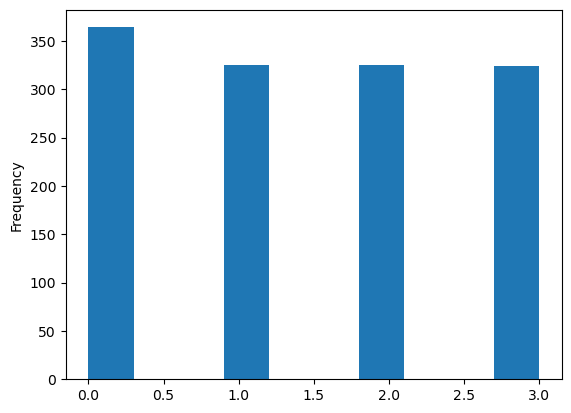

In [58]:
medical_df["region"].plot(kind="hist")

In [59]:
medical_df["region"].isnull().sum()

0

In [51]:
medical_df["smoker"].value_counts()

1    1064
0     274
Name: smoker, dtype: int64

In [52]:
medical_df["smoker"].describe()

count    1338.000000
mean        0.795217
std         0.403694
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: smoker, dtype: float64

<Axes: ylabel='Frequency'>

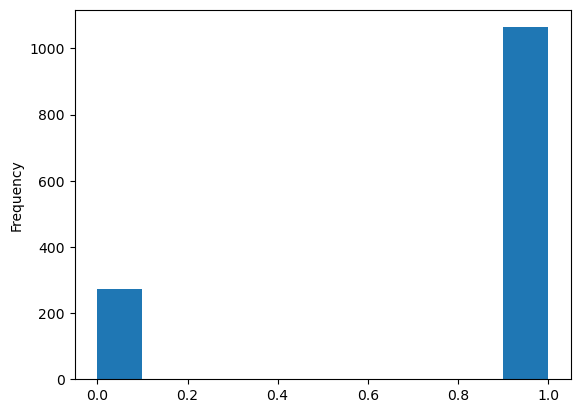

In [53]:
medical_df["smoker"].plot(kind="hist")

In [54]:
medical_df["smoker"].isnull().sum()

0

In [46]:
medical_df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [47]:
medical_df["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

<Axes: ylabel='Frequency'>

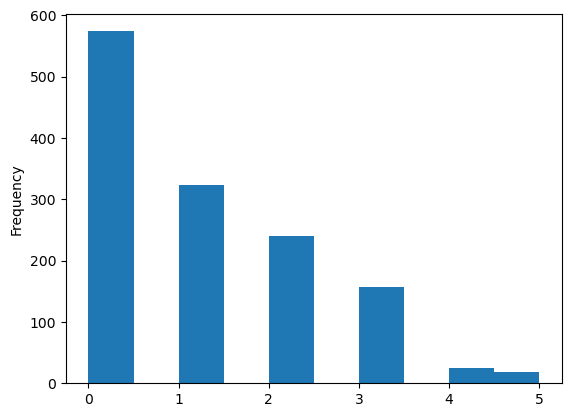

In [48]:
medical_df["children"].plot(kind="hist")

In [49]:
medical_df["children"].isnull().sum()

0

<Axes: >

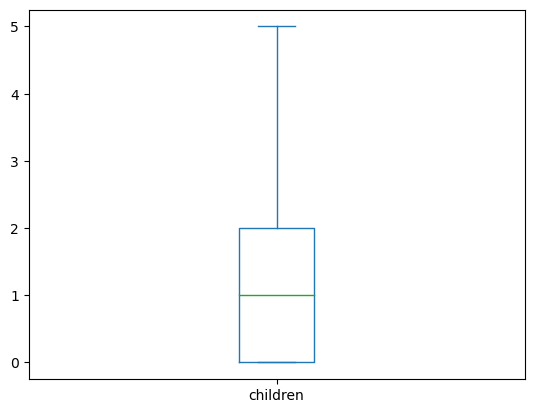

In [50]:
medical_df["children"].plot(kind="box")

In [42]:
medical_df["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [43]:
medical_df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [45]:
medical_df["bmi"].isnull().sum()

0

In [36]:
medical_df["sex"].value_counts()

0    676
1    662
Name: sex, dtype: int64

In [37]:
medical_df["sex"].describe()

count    1338.000000
mean        0.494768
std         0.500160
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

<Axes: ylabel='Frequency'>

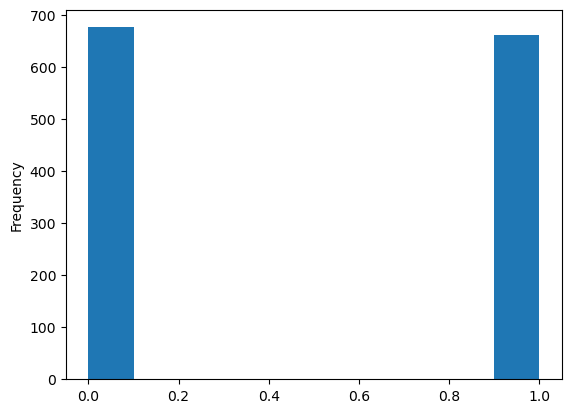

In [39]:
medical_df["sex"].plot(kind="hist")

In [40]:
medical_df["sex"].isnull().sum()

0

In [31]:
medical_df["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [32]:
medical_df["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [34]:
medical_df["age"].isnull().sum()

0

<Axes: >

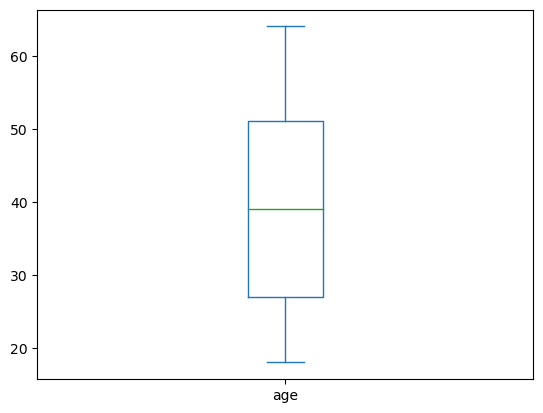

In [35]:
medical_df["age"].plot(kind="box")

<Figure size 300x300 with 0 Axes>

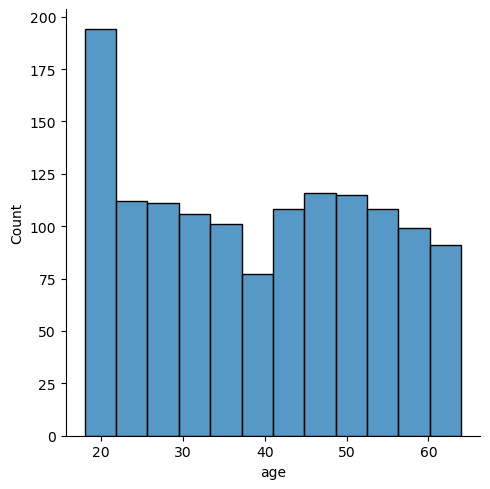

In [7]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='age')

<Figure size 300x300 with 0 Axes>

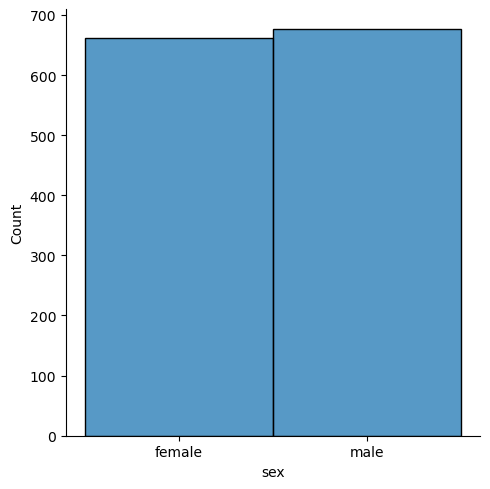

In [8]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex',kind='hist')

In [9]:
medical_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 400x400 with 0 Axes>

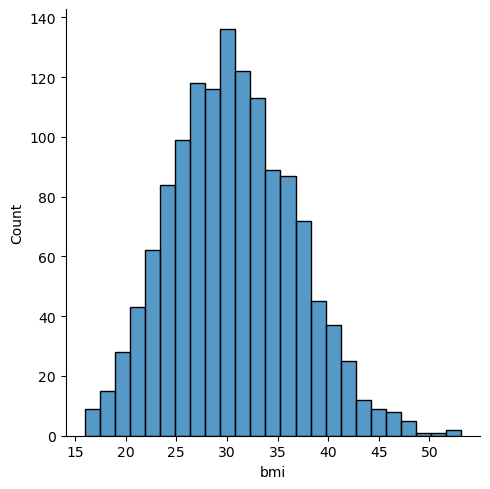

In [11]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi')
plt.show()

In [12]:
medical_df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [14]:
medical_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

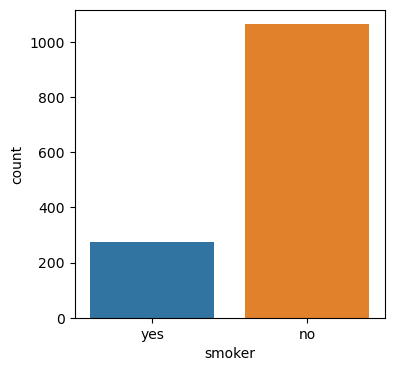

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='smoker')
plt.show()

In [16]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# convert categorical column to numerical

In [17]:
medical_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [19]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# Train Test Split

In [20]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [22]:
X_train.shape

(1204, 6)

In [23]:
X_test.shape

(134, 6)

In [24]:
lg = LinearRegression()
lg.fit(X_train,y_train) # 80 model will be train
y_pred = lg.predict(X_test) # 10 model will be predicted

In [25]:
r2_score(y_test,y_pred)

0.7058997983752826

In [27]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Prediction System

In [29]:
input_df = (19,1,27.900,0,0,1)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lg.predict(input_df_reshaped)
print("Medical Insurance is :",prediction)

Medical Insurance is : [25925.06977975]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
